# 1. Importar Bibliotecas

In [2]:
# Importação das bibliotecas principais para análise de dados e visualização
import pandas as pd
import matplotlib.pyplot as plt

# 2. Carregar dados (FootyStats ou CSVs salvos)

In [3]:
# Leitura dos dados brutos diretamente do repositório no GitHub
url = 'https://raw.githubusercontent.com/danoliveiraed/portfolio-projects/refs/heads/main/campeonato-brasileiro-analise/data/raw/Brasileirao_Matches.csv'

# Carrega o dataset em um DataFrame pandas
dado = pd.read_csv(url, sep=',')
dado.head(3)

,datetime,home_team,home_team_state,away_team,away_team_state,home_goal,away_goal,season,round
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1.0,1.0,2012,1
1,2012-05-19 18:30:00,Sport-PE,PE,Flamengo-RJ,RJ,1.0,1.0,2012,1
2,2012-05-19 21:00:00,Figueirense-SC,SC,Nautico-PE,PE,2.0,1.0,2012,1


In [4]:
# Visualização das últimas linhas do conjunto de dados para verificar consistência
dado.tail(3)

,datetime,home_team,home_team_state,away_team,away_team_state,home_goal,away_goal,season,round
4177,2022-11-13 16:00:00,Goias-GO,GO,Sao Paulo-SP,SP,NaN,NaN,2022,38
4178,2022-11-13 16:00:00,Cuiaba-MT,MT,Coritiba-PR,PR,NaN,NaN,2022,38
4179,2022-11-13 16:00:00,Atletico-PR,PR,Botafogo-RJ,RJ,NaN,NaN,2022,38


## 3. Limpeza e tratamento

In [5]:
# Verificação da presença de valores nulos por coluna
print(dado.isnull().sum())

datetime            0
home_team           0
home_team_state     0
away_team           0
away_team_state     0
home_goal          82
away_goal          82
season              0
round               0
dtype: int64


In [6]:
# Remoção de linhas com dados ausentes (jogos sem placar final)
dado = dado.dropna()
print(dado.isnull().sum())

datetime           0
home_team          0
home_team_state    0
away_team          0
away_team_state    0
home_goal          0
away_goal          0
season             0
round              0
dtype: int64


In [7]:
# Renomeia as colunas para nomes em português e mais amigáveis
dado.columns = [
    'data',
    'mandante',
    'estado_mandante',
    'visitante',
    'estado_visitante',
    'gols_mandante',
    'gols_visitante',
    'temporada',
    'rodada'
]
dado.head(1)

,data,mandante,estado_mandante,visitante,estado_visitante,gols_mandante,gols_visitante,temporada,rodada
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1.0,1.0,2012,1


In [24]:
# Conversão da coluna de data para o formato datetime do pandas
dado['data'] = pd.to_datetime(dado['data'])
dado.head(1)

,data,mandante,estado_mandante,visitante,estado_visitante,gols_mandante,gols_visitante,temporada,rodada,resultado_mandante
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1,1,2012,1,E


In [9]:
# Conversão dos campos numéricos para tipo inteiro
dado['gols_mandante'] = dado['gols_mandante'].astype(int)
dado['gols_visitante'] = dado['gols_visitante'].astype(int)
dado['temporada'] = dado['temporada'].astype(int)
dado['rodada'] = dado['rodada'].astype(int)
dado.head(1)

,data,mandante,estado_mandante,visitante,estado_visitante,gols_mandante,gols_visitante,temporada,rodada
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1,1,2012,1


In [10]:
# Remoção de espaços em branco nos nomes dos times
dado['mandante'] = dado['mandante'].str.strip()
dado['visitante'] = dado['visitante'].str.strip()
dado.head(1)

,data,mandante,estado_mandante,visitante,estado_visitante,gols_mandante,gols_visitante,temporada,rodada
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1,1,2012,1


In [11]:
# Verificação da existência de registros duplicados
print(dado.duplicated().sum())

0


# 4. Criação de análises

In [12]:
# Função que determina o resultado do mandante (Vitória, Empate ou Derrota)
def resultado_mandante(row):
    if row['gols_mandante'] > row['gols_visitante']:
        return 'V'
    elif row['gols_mandante'] == row['gols_visitante']:
        return 'E'
    else:
        return 'D'

# Aplica a função ao DataFrame para criar nova coluna com o resultado do mandante
dado['resultado_mandante'] = dado.apply(resultado_mandante, axis=1)
dado.head(1)

,data,mandante,estado_mandante,visitante,estado_visitante,gols_mandante,gols_visitante,temporada,rodada,resultado_mandante
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1,1,2012,1,E


In [13]:
# Contagem dos resultados possíveis
vitorias_mandante = (dado['resultado_mandante'] == 'V').sum()
empates = (dado['resultado_mandante'] == 'E').sum()
vitorias_visitante = (dado['resultado_mandante'] == 'D').sum()  # quando mandante perde, visitante ganha

In [14]:
# Cálculo dos percentuais de cada tipo de resultado
total_jogos = len(dado)

percent_vit_mandante = vitorias_mandante / total_jogos * 100
percent_empates = empates / total_jogos * 100
percent_vit_visitante = vitorias_visitante / total_jogos * 100

# Impressão dos resultados no console
print(f'Vitórias do mandante: {percent_vit_mandante:.2f}%')
print(f'Empates: {percent_empates:.2f}%')
print(f'Vitórias do visitante: {percent_vit_visitante:.2f}%')

Vitórias do mandante: 48.71%
Empates: 27.14%
Vitórias do visitante: 24.16%


In [15]:
# Criação de DataFrame de percent
contagem_resultados = dado['resultado_mandante'].value_counts().rename(index={
    'V': 'Vitória Mandante',
    'E': 'Empate',
    'D': 'Vitória Visitante'
})

percentuais = (contagem_resultados / total_jogos * 100).round(2)

dado_percent = pd.DataFrame({
    'Resultado': percentuais.index,
    'Percentual': percentuais.values
})

dado_percent

,Resultado,Percentual
0,Vitória Mandante,48.71
1,Empate,27.14
2,Vitória Visitante,24.16


In [48]:
#total de gosl por time

gols_mandante = dado.groupby('mandante')['gols_mandante'].sum()
gols_visitante = dado.groupby('visitante')['gols_visitante'].sum()

gols_por_time = gols_mandante.add(gols_visitante, fill_value=0)
gols_por_time.sort_values(ascending=False)

gols_por_time = gols_por_time.reset_index()
gols_por_time.columns = ['time', 'gols_marcados']
gols_mandante.head(3)
gols_visitante.head(3)
gols_por_time.head(3)

,time,gols_marcados
0,America-MG,121
1,Atletico-GO,178
2,Atletico-MG,612


In [49]:
#desempenho
gols_sofridos_mandante = dado.groupby('mandante')['gols_visitante'].sum()
gols_sofridos_visitante = dado.groupby('visitante')['gols_mandante'].sum()
gols_sofridos_mandante.head(3)
gols_sofridos_visitante.head(3)

gols_sofridos_por_time = gols_sofridos_mandante.add(gols_sofridos_visitante, fill_value=0)
gols_sofridos_por_time.sort_values(ascending=False)
gols_sofridos_por_time.head(3)

gols_sofridos_por_time = gols_sofridos_por_time.reset_index()
gols_sofridos_por_time.columns=['time', 'gols_sofridos']
gols_sofridos_por_time.head(3)

,time,gols_sofridos
0,America-MG,172
1,Atletico-GO,251
2,Atletico-MG,462


In [64]:
#jogos por estado
jogos_estado = dado.groupby('estado_mandante')['mandante'].count().sort_values(ascending=False)

jogos_estado = jogos_estado.reset_index()
jogos_estado.columns = ['estados', 'numero_jogos']
jogos_estado


,estados,numero_jogos
0,SP,986
1,RJ,710
2,MG,429
3,RS,410
4,PR,353
5,SC,338
6,BA,247
7,PE,209
8,GO,201
9,CE,163


In [81]:
#desempenho mandante x visitante
vitorias_mandante = dado[dado['resultado_mandante'] == 'V']
vitorias_visitante = dado[dado['resultado_mandante'] == 'D']

des_mandante = vitorias_mandante.groupby('mandante').size().sort_index()
des_visitante = vitorias_visitante.groupby('visitante').size().sort_index()

des_mandante = des_mandante.reset_index()
des_mandante.columns = ['time', 'vitorias_mandante']

des_visitante = des_visitante.reset_index()
des_visitante.columns = ['time', 'vitorias_visitante']

des_mandante.head()
des_visitante.head()


,time,vitorias_visitante
0,America-MG,10
1,Atletico-GO,22
2,Atletico-MG,61
3,Atletico-PR,47
4,Avai-SC,11


In [95]:
#merge desempenho

des_total = pd.merge(des_mandante, des_visitante, on='time', how='outer').fillna(0)

des_total['vitorias_mandante'] = des_total['vitorias_mandante'].astype(int)
des_total['vitorias_visitante'] = des_total['vitorias_visitante'].astype(int)
des_total['total_vitorias'] = des_total['vitorias_mandante'] + des_total['vitorias_visitante']
des_total

,time,vitorias_mandante,vitorias_visitante,total_vitorias
0,America-MG,32,10,42
1,Atletico-GO,26,22,48
2,Atletico-MG,131,61,192
3,Atletico-PR,106,47,153
4,Avai-SC,20,11,31
5,Bahia-BA,62,30,92
6,Botafogo-RJ,73,41,114
7,Ceara-CE,35,16,51
8,Chapecoense-SC,48,22,70
9,Corinthians-SP,115,57,172


In [96]:
# Total de jogos como mandante
jogos_mandante = dado.groupby('mandante').size().reset_index(name='jogos_mandante')
jogos_mandante.rename(columns={'mandante': 'time'}, inplace=True)

# Total de jogos como visitante
jogos_visitante = dado.groupby('visitante').size().reset_index(name='jogos_visitante')
jogos_visitante.rename(columns={'visitante': 'time'}, inplace=True)

# Junta os jogos com o desempenho de vitórias
des_total = pd.merge(des_total, jogos_mandante, on='time', how='outer')
des_total = pd.merge(des_total, jogos_visitante, on='time', how='outer')
des_total.fillna(0, inplace=True)

# Garante tipo inteiro
des_total[['jogos_mandante', 'jogos_visitante']] = des_total[['jogos_mandante', 'jogos_visitante']].astype(int)

# Total de jogos
des_total['total_jogos'] = des_total['jogos_mandante'] + des_total['jogos_visitante']

# Percentual de aproveitamento em vitórias
des_total['percentual_vitorias'] = (des_total['total_vitorias'] / des_total['total_jogos']) * 100

# Ordena por maior aproveitamento
des_total = des_total.sort_values(by='percentual_vitorias', ascending=False)

# Visualiza
des_total[['time', 'total_vitorias', 'total_jogos', 'percentual_vitorias']].head()


,time,total_vitorias,total_jogos,percentual_vitorias
25,Palmeiras-SP,176,372,47.311828
16,Flamengo-RJ,193,410,47.073171
2,Atletico-MG,192,409,46.943765
20,Gremio-RS,170,380,44.736842
9,Corinthians-SP,172,410,41.951220


In [ ]:
#(Desempenho por temporada (por exemplo: pontos, gols pró/contra por time)) Por num período de tempo ou total e juntar ao des_total?

# 5. Visualizações com Seaborn e Matplotlib

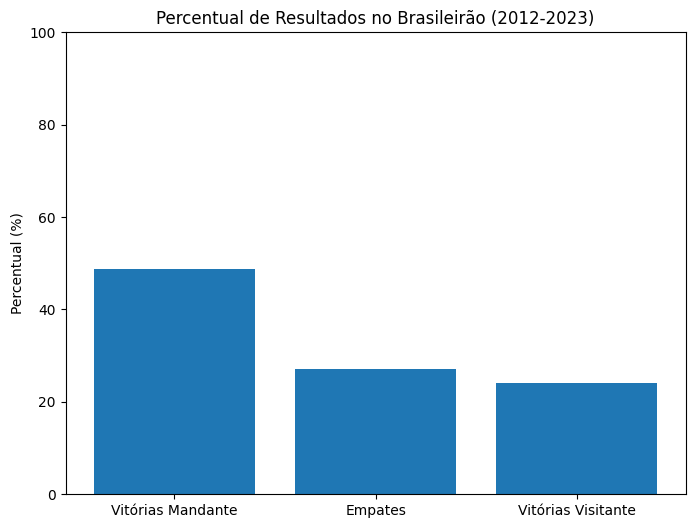

In [17]:
# Criação de gráfico de barras com os percentuais de resultado por tipo
import matplotlib.pyplot as plt

labels = ['Vitórias Mandante', 'Empates', 'Vitórias Visitante']
percentuais = [percent_vit_mandante, percent_empates, percent_vit_visitante]

plt.figure(figsize=(8,6))
plt.bar(labels, percentuais)
plt.ylabel('Percentual (%)')
plt.title('Percentual de Resultados no Brasileirão (2012-2023)')
plt.ylim(0, 100)
plt.show()

# 6. Exportar CSVs tratados

In [18]:
# Exportação do DataFrame tratado para arquivo CSV
dado.to_csv('brasileirao_limpo.csv', index=False)
dado_percent.to_csv('percent_resultados.csv', index=False)
gols_por_time.to_csv('gols_por_time.csv', index=False)
gols_sofridos_por_time.to_csv('gols_sofridos_por_time.csv', index=False)
jogos_estado.to_csv('jogos_por_estado.csv', index=False)
des_total.to_csv('mandante_vs_visitante.csv', index=False)
